In [1]:
from gensim import corpora
from gensim.models import LsiModel, LdaModel
from gensim.parsing.preprocessing import preprocess_string

import re

In [2]:
def clean_text(x):
  pattern = r'[^a-zA-z0-9\s]'
  text = re.sub(pattern, '', x)
  return x

In [3]:
def clean_numbers(x):
  if bool(re.search(r'\d', x)):
    x = re.sub('[0-9]{5,}', '#####', x)
    x = re.sub('[0-9]{4}', '####', x)
    x = re.sub('[0-9]{3}', '###', x)
    x = re.sub('[0-9]{2}', '##', x)
    return x



In [4]:
def clean(x):
  x = clean_text(x)
  x = clean_numbers(x)
  return x

In [5]:
# Create a model that uses LsiModel
def create_lsa_model(documents, dictionary, number_of_topics):
  document_terms = [dictionary.doc2bow(doc) for doc in documents]
  return LsiModel(document_terms, num_topics=number_of_topics, id2word = dictionary)

In [6]:
#def prepare_documents(documents):
#  print('Preparing documents')
 # documents = [clean(document) for document in documents]
  #documents = [preprocess_string(doc) for doc in documents]
  #return documents

In [7]:
def prepare_documents(documents):
  print('Preparing documents')
  documents = [clean(document) for document in documents]
  new_documents = []
  for doc in documents:
      if doc:
          new_documents.append(preprocess_string(doc))
  return new_documents


In [8]:
def run_lsa_process(documents, number_of_topics=10):
  documents = prepare_documents(documents)
  dictionary = corpora.Dictionary(documents)
  lsa_model = create_lsa_model(documents, dictionary, number_of_topics)
  print(lsa_model)
  return documents, dictionary, lsa_model

In [9]:
import numpy as np
from steam_review_scraper import get_game_review 
import timeit

start_time = timeit.default_timer()

reviews = get_game_review(699130, language='english')

elapsed_time = timeit.default_timer() - start_time
print(f"Total Elapsed time: {elapsed_time:.2f} seconds")

Total Elapsed time: 118.55 seconds


In [10]:
# https://www.kaggle.com/datasets/tphaterp/pubmed-fibromyalgia-article-abstracts
import pandas as pd
df = reviews
print(df['review'])
reviews = df['review']
# https://www.kaggle.com/datasets/gpreda/covid19-tweets


0       Basically  and  are included.Copied all my pro...
1                                     Where is Brad Pitt?
2                            the z stands for zombie guys
3       is the game good? yes.is the online co-op fun?...
4       : Most of us know the film by director Marc Fo...
                              ...                        
4171    This is a game to kill thousands of zombies an...
4172    advertised as a new game but is basically a gl...
4173    i cant use my ps5 controller, please steam to ...
4174    If you have friends to play with, specially wi...
4175    ohhhhhhhhhhh have a game in epic and steam ..b...
Name: review, Length: 4176, dtype: object


In [11]:
abstract_reviews = list(reviews)

In [12]:

documents, dictionary, model = run_lsa_process(abstract_reviews, number_of_topics=8)

Preparing documents
LsiModel(num_terms=5884, num_topics=8, decay=1.0, chunksize=20000)


In [13]:
model.print_topics()

[(0,
  '-0.670*"game" + -0.274*"plai" + -0.248*"zombi" + -0.215*"like" + -0.172*"weapon" + -0.139*"level" + -0.122*"class" + -0.112*"hord" + -0.102*"time" + -0.100*"good"'),
 (1,
  '0.591*"game" + -0.377*"zombi" + -0.314*"weapon" + -0.191*"class" + -0.135*"level" + -0.121*"like" + -0.119*"difficulti" + -0.112*"special" + -0.104*"differ" + 0.097*"epic"'),
 (2,
  '0.621*"zombi" + -0.375*"plai" + -0.208*"weapon" + -0.195*"player" + -0.143*"difficulti" + -0.142*"level" + 0.135*"game" + -0.115*"bot" + -0.108*"time" + -0.100*"map"'),
 (3,
  '0.530*"plai" + -0.423*"weapon" + 0.225*"like" + -0.193*"class" + -0.188*"game" + -0.152*"level" + 0.145*"dead" + 0.124*"left" + 0.123*"friend" + 0.119*"time"'),
 (4,
  '0.440*"plai" + -0.232*"bot" + -0.225*"like" + 0.221*"zombi" + -0.203*"infect" + -0.191*"player" + 0.130*"class" + -0.126*"left" + 0.116*"mode" + -0.116*"wai"'),
 (5,
  '-0.319*"good☐" + 0.284*"like" + -0.210*"grind" + -0.200*"bad☐" + -0.200*"zombi" + -0.148*"long" + 0.146*"left" + -0.141*

In [15]:
# abstracts_clean = df.dropna(subset=['abstract'])

# abstracts_clean.head()

In [16]:
from gensim.models.coherencemodel import CoherenceModel

def calculate_coherence_score(documents, dictionary, model):
  coherence_model = CoherenceModel(model=model, texts=documents,dictionary=dictionary,coherence='c_v')
  return coherence_model.get_coherence()

In [17]:
def get_coherence_values(start, stop):
  for num_topics in range(start, stop):
    print(f'\nCalculating coherence for {num_topics} topics')
    documents, dictionary, model = run_lsa_process(reviews, number_of_topics=num_topics)
    coherence = calculate_coherence_score(documents,dictionary,model)
    yield coherence

In [18]:
# calculate the coherence scores for a range between 20 and 25
min_topics, max_topics = 20,25
coherence_scores = list(get_coherence_values(min_topics, max_topics))


Calculating coherence for 20 topics
Preparing documents
LsiModel(num_terms=5884, num_topics=20, decay=1.0, chunksize=20000)

Calculating coherence for 21 topics
Preparing documents
LsiModel(num_terms=5884, num_topics=21, decay=1.0, chunksize=20000)

Calculating coherence for 22 topics
Preparing documents
LsiModel(num_terms=5884, num_topics=22, decay=1.0, chunksize=20000)

Calculating coherence for 23 topics
Preparing documents
LsiModel(num_terms=5884, num_topics=23, decay=1.0, chunksize=20000)

Calculating coherence for 24 topics
Preparing documents
LsiModel(num_terms=5884, num_topics=24, decay=1.0, chunksize=20000)


Text(0.5, 1.0, 'Coherence Scores by number of Topics')

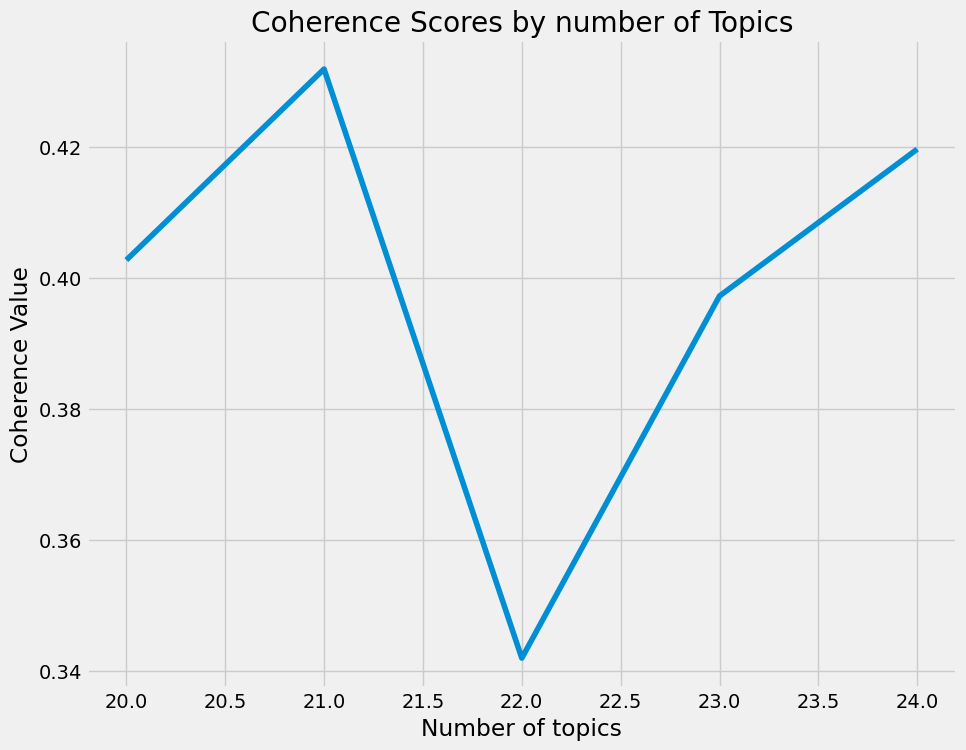

In [19]:
# plot the coherence scores in the chart to see how many topics would be best
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
x = [int(i) for i in range(min_topics, max_topics)]
plt.figure(figsize=(10,8))
plt.plot(x, coherence_scores)
plt.xlabel('Number of topics')
plt.ylabel('Coherence Value')
plt.title('Coherence Scores by number of Topics')

# LDA

In [20]:
reviews.head()

0    Basically  and  are included.Copied all my pro...
1                                  Where is Brad Pitt?
2                         the z stands for zombie guys
3    is the game good? yes.is the online co-op fun?...
4    : Most of us know the film by director Marc Fo...
Name: review, dtype: object

In [21]:
# Create a model that uses LdaModel
def create_lda_model(documents, dictionary, number_of_topics):
  document_terms = [dictionary.doc2bow(doc) for doc in documents]
  return LdaModel(document_terms, num_topics=number_of_topics, id2word = dictionary)

def run_lda_process(documents, number_of_topics=10):
  documents = prepare_documents(documents)
  dictionary = corpora.Dictionary(documents)
  lda_model = create_lda_model(documents, dictionary, number_of_topics)
  print(lda_model)
  return documents, dictionary, lda_model

In [22]:
corpus = [dictionary.doc2bow(doc) for doc in documents]

In [23]:
# create an LdaModel instance that will learn on 10 topics
NUM_TOPICS = 10
ldamodel = LdaModel(reviews, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
#  calculate the coherence scores
from gensim.models.coherencemodel import CoherenceModel
def calculate_coherence_score(documents, dictionary, model):
  coherence_model = CoherenceModel(model=model, texts=documents, dictionary=dictionary,coherence='c_v');
  return coherence_model.get_coherence()

def get_coherence_values(start, stop):
  for num_topics in range(start, stop):
    print(f'\nCalculating coherence for {num_topics} topics')
    ldamodel = LdaModel(corpus, num_topics = num_topics, id2word=dictionary, passes=2)
    coherence = calculate_coherence_score(corpus, dictionary, ldamodel)
    yield coherence

In [ ]:
# create a list of the coherence scores from 10 to 30 topics
min_topics, max_topics = 10,30
coherence_scores = list(get_coherence_values(min_topics, max_topics))

In [ ]:
#plot the coherence scores
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.ticker import MaxNLocator
style.use('fivethirtyeight')
%matplotlib inline
x = [int(i) for i in range(min_topics, max_topics)]
ax = plt.figure(figsize=(10,8))
plt.xticks(x)
plt.plot(x, coherence_scores)
plt.xlabel('Number of topics')
plt.ylabel('Coherence Value')
plt.title('Coherence Scores', fontsize=10);

In [ ]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
dictionary = corpora.Dictionary(abstracts_doc)
corpus = [dictionary.doc2bow(text) for text in abstracts_doc]
NUM_TOPICS = 8
ldamodel = LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

In [ ]:
ldamodel.print_topics(num_words=6)

In [ ]:
for index, topic in ldamodel.show_topics(formatted=False, num_words= 30):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))

In [ ]:
for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

In [ ]:
lda_model:LdaModel = LdaModel(corpus, num_topics=50, passes=4)

**Topic Modeling Using LDA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
%cd "/content/drive/MyDrive/Colab Notebooks gmail/datasets/"
%ls

In [ ]:
!kaggle datasets download -d tajakuz/gincodataframededuptraindevtest --force --unzip

In [ ]:
import pandas as pd
papers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks gmail/datasets/NIPS Papers/NIPS Papers/papers.csv')

In [ ]:
papers

In [ ]:
papers = papers.drop(columns=["id", "event_type", "pdf_name"], axis=1).sample(100)
papers.head()

In [ ]:
import re
#remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))



In [ ]:
#convert to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())


In [ ]:
papers["paper_text_processed"].head()

In [ ]:
from wordcloud import WordCloud
long_string = ','.join(list(papers['paper_text_processed'].values)) #join all papers
wc = WordCloud(max_words=1000)
wc.generate(long_string)
wc.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])



In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [ ]:
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

In [ ]:
print(data_words[:1][0][:30])

In [ ]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus)

In [ ]:
from pprint import pprint

In [ ]:
#LDA model training
num_topics = 10

lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
!pip install pyLDAvis

In [ ]:
!mkdir ./pyldavis_results

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis
import os

In [ ]:
pyLDAvis.enable_notebook()

In [ ]:
LDAvis_data_filepath = os.path.join('./pyldavis_results/ldavis_prepared_' + str(num_topics))

In [ ]:
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [ ]:
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

In [ ]:
pyLDAvis.save_html(LDAvis_prepared, './pyldavis_results/ldavis_prepared_'+ str(num_topics) +'.html')

In [ ]:
LDAvis_prepared
